(x^(i), y^(i)) i-ti uzorak

h(x^(i)) = theta1 * x1^(i) + theta2 * x2^(i) + ... + thetam * xm^(i) + theta0

x^(i) = [x1^(i) x2^(i) ... xm^(i)]^T

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [1]:
import numpy as np
import pandas as pd #za citanje podataka
import matplotlib.pyplot as plt
import seaborn as sns # za neke grafike

In [2]:
data = pd.read_csv("../Data/Housing.csv")
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
kolone = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

def funkcija_map(x):
    return x.map({"yes": 1, "no": 0})

data[kolone] = data[kolone].apply(funkcija_map)

data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished


In [4]:
# kolonu furnishing status cemo mapirati pomocu one-hot encoding-a, jer ako budemo mapirali u 0,1,2 on ce misliti da 2+2 nesto 
# znaci, 0 1 2 -> 0 0, 0 1, 1 0

status = pd.get_dummies(data["furnishingstatus"], drop_first=True) # posto su nama dovoljna dva bita mozemo jednu kolonu dropati
status # imena kolona nije bitno

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [5]:
# sad zelimo da dodamo ove nove dvije kolone u nasu data
data = pd.concat([data, status], axis=1) # concatenate, axis = 1 znaci da je po kolonama dodavanje, 0 po redovima
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,semi-furnished,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,semi-furnished,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,unfurnished,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,furnished,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,unfurnished,False,True


In [6]:
data.drop('furnishingstatus', axis=1, inplace=True)
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,True,False
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,True,False
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,False,True
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,False,False
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,False,True


In [7]:
from sklearn.model_selection import train_test_split
np.random.seed(0) # za poredenje rezultata

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42) # df = dataframe
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,False,True
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,False,False
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,True,False
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,True,False
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
357,3773000,6930,4,1,2,0,0,0,0,0,1,0,False,False
39,7910000,6000,4,2,4,1,0,0,0,1,1,0,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False


In [8]:
# restartovanje indexa, potrebno je dropati stare i sacuvati nove
df_test = df_test.reset_index(drop=True)
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4060000,5900,4,2,2,0,0,1,0,0,1,0,False,True
1,6650000,6500,3,2,3,1,0,0,0,1,0,1,False,False
2,3710000,4040,2,1,1,1,0,0,0,0,0,0,True,False
3,6440000,5000,3,1,2,1,0,0,0,1,0,0,True,False
4,2800000,3960,3,1,1,1,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,9100000,6000,4,1,2,1,0,1,0,0,2,0,True,False
105,3773000,6930,4,1,2,0,0,0,0,0,1,0,False,False
106,7910000,6000,4,2,4,1,0,0,0,1,1,0,True,False
107,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False


In [9]:
df_train = df_train.reset_index(drop=True)
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7525000,6000,3,2,4,1,0,0,0,1,1,0,False,False
1,6300000,7200,3,2,1,1,0,1,0,1,3,0,True,False
2,3920000,3816,2,1,1,1,0,1,0,1,2,0,False,False
3,3430000,2610,3,1,2,1,0,1,0,0,0,1,False,True
4,3010000,3750,3,1,2,1,0,0,0,0,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,6755000,6000,4,2,4,1,0,0,0,1,0,0,False,True
432,6160000,5450,4,2,1,1,0,1,0,1,0,1,True,False
433,4340000,4500,3,2,3,1,0,0,1,0,1,0,False,False
434,3290000,4040,2,1,1,1,0,0,0,0,0,0,False,True


In [10]:
print("Velicina train skupa: ", len(df_train))
print("Velicina test skupa: ", len(df_test))

Velicina train skupa:  436
Velicina test skupa:  109


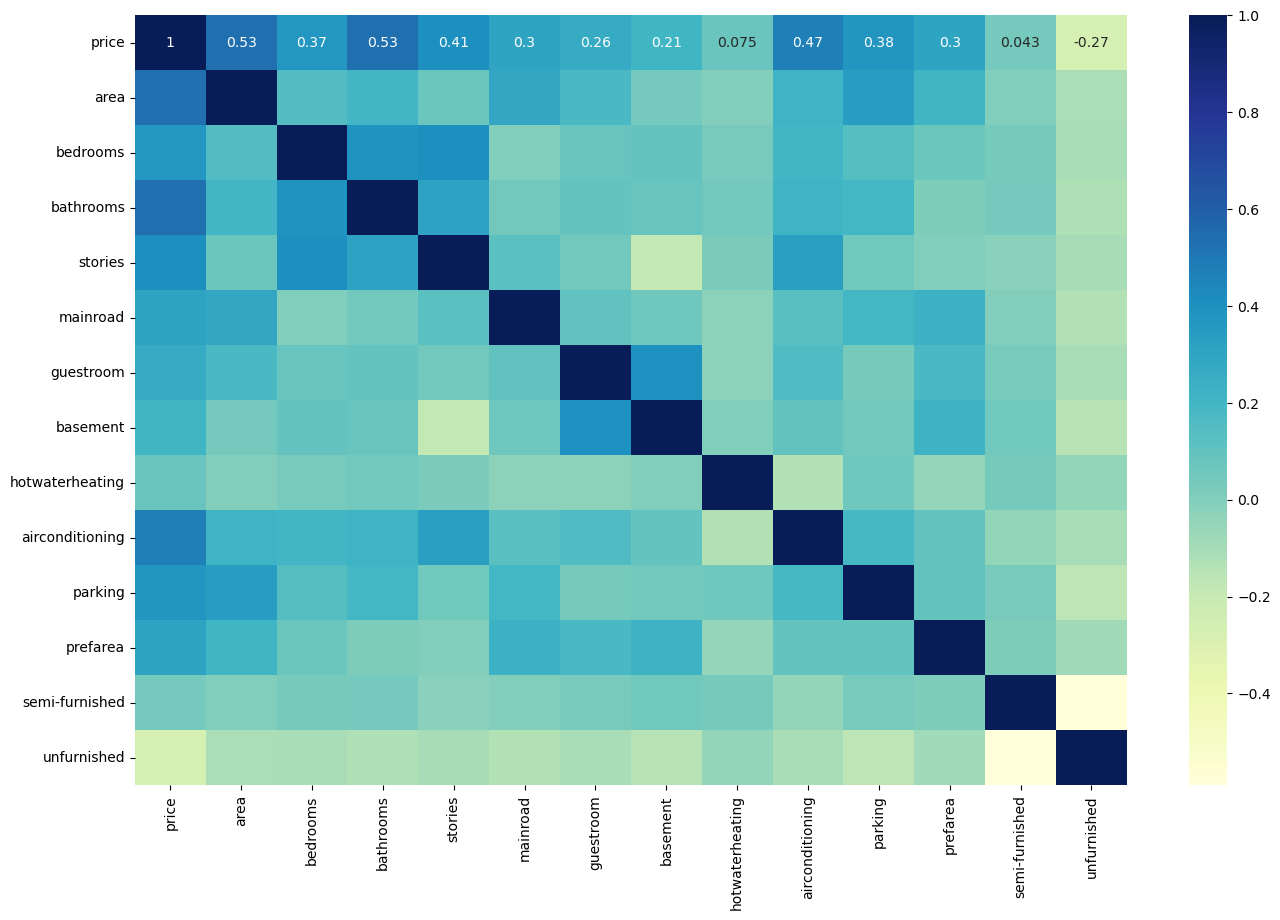

In [11]:
# grafik na kojem mozemo provjeriti koja je linearna korelacija izmedu svake dvije varijable
# pomocu ovog plota mozemo izbaciti ako vidimo da nisu potrebni recimo heatwaterhiting
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True, cmap="YlGnBu") # cmap odreduje boje
plt.show()

In [12]:
# funkciaj koja iz datafram-a pravi niz

def df_to_vector(df):
    return df.iloc[:, :].values

In [13]:
y_train = np.array(df_train.pop('price'))
y_train

array([ 7525000,  6300000,  3920000,  3430000,  3010000,  4620000,
        1750000,  3010000,  2520000,  3710000,  3703000,  2450000,
        4200000,  3640000,  3640000,  5383000,  1767150,  5250000,
        3500000,  6790000,  3920000,  3920000,  5810000,  5250000,
        5950000,  3500000,  2408000,  2660000,  5285000,  3675000,
        4200000,  2275000,  3570000,  4620000,  4200000,  3087000,
        3255000,  8855000,  3640000,  7343000,  4690000,  4305000,
        3640000,  4403000,  4270000,  2940000,  4795000,  8540000,
        4235000,  7700000,  3500000,  3360000,  4970000,  3150000,
        5530000,  5880000,  3710000,  3640000,  8400000,  6083000,
        4760000,  3080000,  5243000,  7245000,  4550000,  8575000,
        8960000,  3500000,  6930000,  4613000,  4340000,  4473000,
        3780000,  6300000,  5215000,  5040000,  4515000,  8645000,
        2660000,  3118850,  2450000, 10850000,  6020000,  7560000,
        4123000,  4098500,  9100000,  7455000,  4900000,  3423

In [14]:
x_train = df_to_vector(df_train)
x_train

array([[6000, 3, 2, ..., 0, False, False],
       [7200, 3, 2, ..., 0, True, False],
       [3816, 2, 1, ..., 0, False, False],
       ...,
       [4500, 3, 2, ..., 0, False, False],
       [4040, 2, 1, ..., 0, False, True],
       [5500, 3, 2, ..., 0, True, False]], dtype=object)

In [15]:
x_train.shape

(436, 13)

In [16]:
y_test =  np.array(df_test.pop('price'))
print("y_test shape: ", y_test.shape)
x_test = df_to_vector(df_test)
print("x_test shape: ", x_test.shape)

y_test shape:  (109,)
x_test shape:  (109, 13)


Implementacija linearne regresije

In [17]:
# model linearne regresije ce biti klasa

class LinearnaRegresija():
    # prvi parametar svake f-je u klasi je self = this, sluzi za pristupanje atributima
    # svaka f-ja koju klasa uvijek ima pocinje i zavrsava sa dvije donje crte __ __
    # uvijek mozemo dati default-nu vrijednost
    
    def __init__(self, learning_rate=0.01, batch_size=1, iterations=1000): # funkcija za konstruktor
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.iterations = iterations
    
    def train(self, x, y):
        # num samples, num features, je m koliko x ima featura tj kolona
        self.n, self.m = x.shape
        self.W = np.ones(self.m) # pravi niz 1 velicine m
        self.b = 0
        self.x = x
        self.y = y

        # ucenje pomocu gradijentnog spusta
        for i in range(self.iterations):
            self.update_weigths()
        
        return

    # funkcija za azuriranje tezina pomocu gradijentnog spusta
    def update_weigths(self):
        y_pred = self.predict(self.x) # prvo predict-amo
                
        # x -> n x m
        # x.T -> m x n
        # y i y_pred -> n x 1
        # y - y_pred -> n x 1
        
        # racunanje gradijenta
        dW = (self.x.T).dot(y_pred - self.y) / self.n
        db = np.sum(y_pred - self.y) / self.n

        # azuriraj tezine
        self.W = self.W - dW * self.learning_rate
        self.b = self.b - db * self.learning_rate

    # hipoteticka funkcija h(x)
    def predict(self, x): # predict-a y, ovo je hipoteza
        return x.dot(self.W) + self.b # dot je vektorski proizvod

In [18]:
model = LinearnaRegresija(learning_rate=1e-10, iterations=1000)
model.train(x_train, y_train)

In [19]:
#model.W

In [20]:
y_train_pred = model.predict(x_train)
y_train_pred

array([4811600.285466711, 5773917.484711789, 3060178.9885440026,
       2093052.193352342, 3007251.067707822, 4017684.8674359,
       3087444.137967882, 4070608.6712983116, 2550148.0591675774,
       4827632.444779763, 2502035.6995590213, 6174874.449076059,
       5613526.866075468, 2862904.655691039, 2405801.5429002503,
       5172466.983081747, 1924642.1497991225, 4250247.214017247,
       5953541.961004515, 9695358.198381864, 5822032.211990633,
       2405803.0794173856, 4170053.059311242, 6736235.351702168,
       5232612.826650912, 2927057.9974477626, 2915024.9914381523,
       3207732.4255265566, 3688893.908235336, 4522896.088812362,
       2822808.095587585, 1472352.7719109997, 2526092.6838132367,
       4554980.616168463, 1720155.833854068, 6495647.866627188,
       3151594.5487053287, 5148410.595179547, 3311988.2942360668,
       9174103.009899223, 7752281.11081817, 8308012.3439824395,
       4779520.035835928, 2309572.4459232027, 5100288.6640826855,
       2790729.801610085, 

In [21]:
from scipy import stats
errors = (abs(y_train_pred - y_train))
errors

array([2713399.714533289, 526082.5152882114, 859821.0114559974,
       1336947.806647658, 2748.9322921778075, 602315.1325641,
       1337444.1379678822, 1060608.6712983116, 30148.05916757742,
       1117632.444779763, 1200964.3004409787, 3724874.4490760593,
       1413526.8660754682, 777095.3443089612, 1234198.4570997497,
       210533.01691825315, 157492.14979912248, 999752.7859827532,
       2453541.961004515, 2905358.1983818635, 1902032.211990633,
       1514196.9205826144, 1639946.9406887582, 1486235.3517021677,
       717387.173349088, 572942.0025522374, 507024.99143815227,
       547732.4255265566, 1596106.0917646638, 847896.0888123624,
       1377191.9044124149, 802647.2280890003, 1043907.3161867633,
       65019.38383153733, 2479844.166145932, 3408647.8666271884,
       103405.45129467128, 3706589.4048204534, 328011.70576393325,
       1831103.0098992232, 3062281.11081817, 4003012.3439824395,
       1139520.0358359283, 2093427.5540767973, 830288.6640826855,
       149270.198389

In [22]:
#stats.describe(errors)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Greska')

<Figure size 640x480 with 0 Axes>

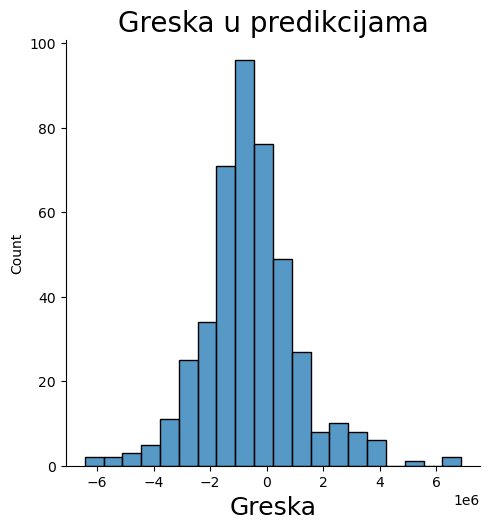

In [23]:
# histogram gresaka koje je model napravio, u ovom slucaju greska je razlika izmedu predvidene i stvarne cijene
fig = plt.figure()
sns.displot((y_train_pred - y_train), bins=20)
plt.title('Greska u predikcijama', fontsize=20)         # ime grafika
plt.xlabel('Greska', fontsize=18)                       # ime x-ose

In [24]:
stats.describe(y_test) # vidimo da je mean = 5 miliona, a iznad je 1,6 milion

DescribeResult(nobs=109, minmax=(1750000, 13300000), mean=5007536.697247706, variance=5101371822714.916, skewness=1.0691318620785764, kurtosis=1.3233202694135677)

In [25]:
# da vidimo koliko grijesimo na train skupu
y_test_pred = model.predict(x_test)
y_test_pred
errors = abs(y_test - y_test_pred)
#stats.describe(errors) 

In [26]:
# vidimo da grijesi 1,3 miliona sto znaci da i nije nam model toliko los

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_squared_error(y_train, y_train_pred))

1346296.8233976648
3219450911643.781


In [29]:
print('Trenirani parametar W: ', model.W)
print('Trenirani parametar b: ', model.b)

Trenirani parametar W:  [801.930702600598 1.5374126978211753 1.2478582259706508 1.3564914272848279
 1.1515664769554634 1.0395894723618895 1.0757913122710854
 1.011604728516698 1.0776811129214892 1.1365108895670724 1.050817888642667
 1.0767855507314026 1.0381255389989363]
Trenirani parametar b:  0.17018439001693983


Predikcija u testnom skupu

In [31]:
# y_test_pred = model.predict(x_test)

# print('Predvidjena cijena kuce: ', np.round(y_test_pred[:3], 2))
# print('Prava cijena kuce: ', y_test[:3])
      

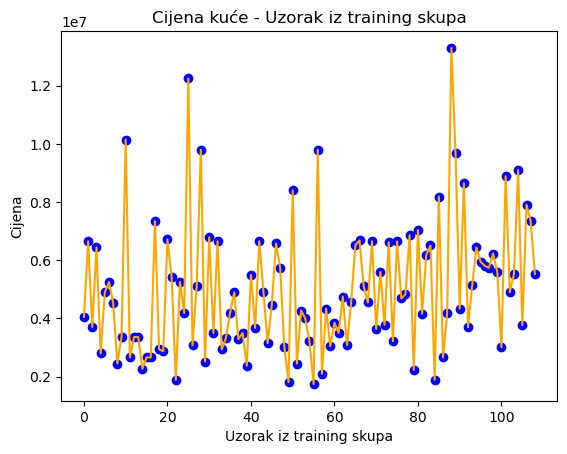

In [32]:
# Vizuelizacija na testnom skupu

plt.scatter(np.arange(len(x_test)), y_test, color='blue')
plt.plot(np.arange(len(x_test)), y_test, color='orange')
plt.title('Cijena kuće - Uzorak iz training skupa')
plt.xlabel('Uzorak iz training skupa')
plt.ylabel('Cijena')
plt.show()

MINMAX SCALER

In [39]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(x_train)
x_train_minmax = minmax_scaler.transform(x_train)

In [40]:
stats.describe(x_train_minmax)
# minimum po svakoj koloni je 0, maksimum po svakoj koloni je 1, mean po svakoj koloni je dat u mean

DescribeResult(nobs=436, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])), mean=array([0.24083467, 0.39174312, 0.08868502, 0.26070336, 0.85779817,
       0.17889908, 0.35779817, 0.05045872, 0.30733945, 0.22859327,
       0.23394495, 0.43119266, 0.31422018]), variance=array([0.02295201, 0.02236845, 0.02532251, 0.08181365, 0.12226089,
       0.14723189, 0.23030686, 0.04802278, 0.2133713 , 0.08121375,
       0.1796267 , 0.24582938, 0.21598123]), skewness=array([ 1.40520033,  0.5292181 ,  1.62165488,  1.11054758, -2.04891031,
        1.67559562,  0.59330823,  4.10747147,  0.8351287 ,  0.8479997 ,
        1.25694034,  0.27787309,  0.80042222]), kurtosis=array([ 2.96003705,  0.84166383,  2.50648472,  0.76747117,  2.19803347,
        0.80762068, -1.64798535, 14.87132191, -1.30256005, -0.55985092,
       -0.42010097, -1.92278655, -1.35932427]))

In [41]:
model = LinearnaRegresija(learning_rate=1e-2, iterations=10000)
model.train(x_train_minmax, y_train)
y_train_pred = model.predict(x_train_minmax)
print(mean_absolute_error(y_train, y_train_pred))

724976.483444092


In [43]:
x_test_minmax = minmax_scaler.transform(x_test)
stats.describe(x_test_minmax)

DescribeResult(nobs=109, minmax=(array([0.00343643, 0.2       , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ]), array([0.79381443, 0.8       , 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])), mean=array([0.23959646, 0.39816514, 0.12232416, 0.29969419, 0.86238532,
       0.17431193, 0.32110092, 0.02752294, 0.34862385, 0.24159021,
       0.23853211, 0.35779817, 0.37614679]), variance=array([0.01960656, 0.01962623, 0.03839619, 0.09042172, 0.11977574,
       0.14525994, 0.22001359, 0.02701325, 0.2291879 , 0.08821309,
       0.18331634, 0.23190622, 0.23683316]), skewness=array([ 0.85316439,  0.33719383,  1.35202031,  0.9594459 , -2.10386338,
        1.71696046,  0.76632805,  5.77595319,  0.63532064,  0.80304421,
        1.22701292,  0.59330823,  0.51134896]), kurtosis=array([ 1.18262160e+00,  5

In [44]:
y_test_pred = model.predict(x_test_minmax)
print(mean_absolute_error(y_test, y_test_pred))

949489.7283765072


In [45]:
print(np.max(x_train))
print(np.max(x_test))

16200
13200


STANDARD SCALER

In [48]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_std = std_scaler.transform(x_train)

In [49]:
stats.describe(x_train_std)

DescribeResult(nobs=436, minmax=(array([-1.59150215, -2.62229809, -0.5579503 , -0.91249891, -2.45606557,
       -0.46677307, -0.74642003, -0.23052136, -0.66611456, -0.80305867,
       -0.55262032, -0.870669  , -0.67690027]), array([5.01677451, 4.07162444, 5.73342028, 2.58764353, 0.40715525,
       2.14236869, 1.33972825, 4.33799283, 1.50124327, 2.70998729,
       1.80956067, 1.14854209, 1.47732249])), mean=array([ 1.22226388e-16,  1.62968517e-16,  7.33358328e-17,  6.92616199e-17,
        1.71116943e-16,  9.77811104e-17, -6.51874070e-17, -4.88905552e-17,
        0.00000000e+00, -6.51874070e-17, -4.07421293e-18, -3.05565970e-17,
       -8.14842587e-17]), variance=array([1.00229885, 1.00229885, 1.00229885, 1.00229885, 1.00229885,
       1.00229885, 1.00229885, 1.00229885, 1.00229885, 1.00229885,
       1.00229885, 1.00229885, 1.00229885]), skewness=array([ 1.40520033,  0.5292181 ,  1.62165488,  1.11054758, -2.04891031,
        1.67559562,  0.59330823,  4.10747147,  0.8351287 ,  0.8479997 

In [50]:
model = LinearnaRegresija(learning_rate=1e-2, iterations=10000)
model.train(x_train_std, y_train)
y_train_pred_std = model.predict(x_train_std)
print(mean_absolute_error(y_train, y_train_pred_std))

719242.8936724702


In [51]:
x_test_std = std_scaler.transform(x_test)
stats.describe(x_test_std)

DescribeResult(nobs=109, minmax=(array([-1.5687933 , -1.28351359, -0.5579503 , -0.91249891, -2.45606557,
       -0.46677307, -0.74642003, -0.23052136, -0.66611456, -0.80305867,
       -0.55262032, -0.870669  , -0.67690027]), array([3.65424324, 2.73283993, 3.63629675, 2.58764353, 0.40715525,
       2.14236869, 1.33972825, 4.33799283, 1.50124327, 2.70998729,
       1.80956067, 1.14854209, 1.47732249])), mean=array([-0.00818248,  0.04298849,  0.21163632,  0.13647344,  0.01313404,
       -0.01196854, -0.0765559 , -0.10478244,  0.08947808,  0.04565885,
        0.01083569, -0.14819898,  0.1334037 ]), variance=array([0.85620509, 0.87942395, 1.51977297, 1.10775619, 0.98192552,
       0.98887456, 0.95750237, 0.56380227, 1.07659641, 1.08868108,
       1.02288669, 0.94553115, 1.09906591]), skewness=array([ 0.85316439,  0.33719383,  1.35202031,  0.9594459 , -2.10386338,
        1.71696046,  0.76632805,  5.77595319,  0.63532064,  0.80304421,
        1.22701292,  0.59330823,  0.51134896]), kurtosis=

In [52]:
y_test_pred_std = model.predict(x_test_std)
print(mean_absolute_error(y_test, y_test_pred_std))

970043.4039201614


In [55]:
print(np.mean(x_test_std))
print(np.std(x_test_std))
print(np.mean(x_train_std))
print(np.std(x_train_std))
# znaci da smo dobro ravnomjerno rasporedili podatke

0.025686175962697254
1.0035255999087787
3.0086495515600574e-17
1.0


Feature selection - skontamo koji features su nam nebitni i izbacimo ih - Feature engineering

In [ ]:
# ako su neke dviej kolone bas u velikoj korelaciji
# npr imamo povrsinu su feat-sima i u metrima kvadratnim, njihova zavisnost je linearna i nema potrebe da ih obje drzimo
# kako znati koje treba izbaciti
# neuralne mreze same skontaju
# mi mozemo sami skontati koje manuelno izbaciti
# podaci mogu biti i u kvadratnoj korelaciji 
# nakon sto istreniramo model gledamo weights-e i vidimo koje su kolone nebitne
# ako su negativni a veliki to znaci da ipak utjecu

In [56]:
model.W

array([ 519552.41633998,   57349.55941862,  521879.02774806,
        349251.43890557,  128498.62821472,   88768.66768639,
        187067.80321387,  149862.70299085,  365157.39385091,
        192005.95366748,  266656.35199331,  -62837.32186493,
       -192015.91798222])

In [58]:
sorted(model.W)

[-192015.91798221582,
 -62837.321864933605,
 57349.5594186205,
 88768.66768638579,
 128498.62821471902,
 149862.70299085026,
 187067.80321387295,
 192005.9536674845,
 266656.351993307,
 349251.43890556553,
 365157.39385091484,
 519552.41633998195,
 521879.0277480566]

In [ ]:
from sklearn.feature_selection import RFE

num_features = x_train.shape[1]

for i in range(num_features): # i predstavlja koliko cemo njih izbaciti
    lm1